##  Class Imbalance Handling Techniques

#### Explanation
Class imbalance occurs when one class in a classification problem has significantly fewer instances than the others. This can lead to biased models that favor the majority class. To address class imbalance, various techniques are employed, including oversampling the minority class and undersampling the majority class.

### Oversampling the Minority Class

##### Random Oversampling
Random oversampling involves randomly duplicating examples in the minority class to balance the class distribution.

##### SMOTE (Synthetic Minority Over-sampling Technique)
SMOTE generates synthetic samples for the minority class by interpolating between existing samples.

##### ADASYN (Adaptive Synthetic Sampling)
ADASYN is similar to SMOTE but generates more synthetic data for harder-to-learn examples.

#### Code and Plot
Let's use Python to demonstrate how these oversampling techniques can be applied to handle class imbalance.


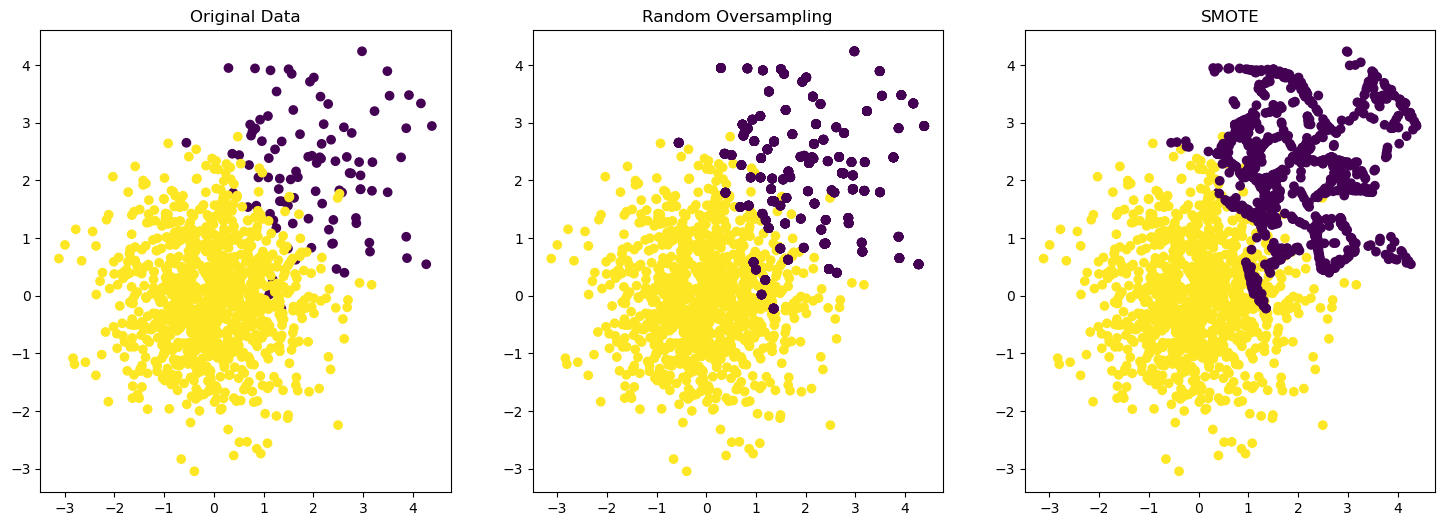

In [5]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data with class imbalance
np.random.seed(0)
X_minority = np.random.normal(loc=2, scale=1, size=(100, 2))
X_majority = np.random.normal(loc=0, scale=1, size=(1000, 2))
X = np.vstack([X_minority, X_majority])
y = np.array([0] * 100 + [1] * 1000)

# Apply oversampling techniques
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(X, y)

smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X, y)

adasyn = ADASYN(random_state=0)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Plot original and oversampled data
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', label='Original Data')
plt.title('Original Data')

plt.subplot(1, 3, 2)
plt.scatter(X_ros[:, 0], X_ros[:, 1], c=y_ros, cmap='viridis', marker='o', label='Oversampled Data')
plt.title('Random Oversampling')

plt.subplot(1, 3, 3)
plt.scatter(X_smote[:, 0], X_smote[:, 1], c=y_smote, cmap='viridis', marker='o', label='Oversampled Data')
plt.title('SMOTE')

plt.show()

### Undersampling the Majority Class

#### Random Undersampling
Random undersampling involves randomly removing examples from the majority class to balance the class distribution.

#### Cluster-Based Undersampling
Cluster-based undersampling uses clustering techniques to find and remove redundant examples in the majority class.


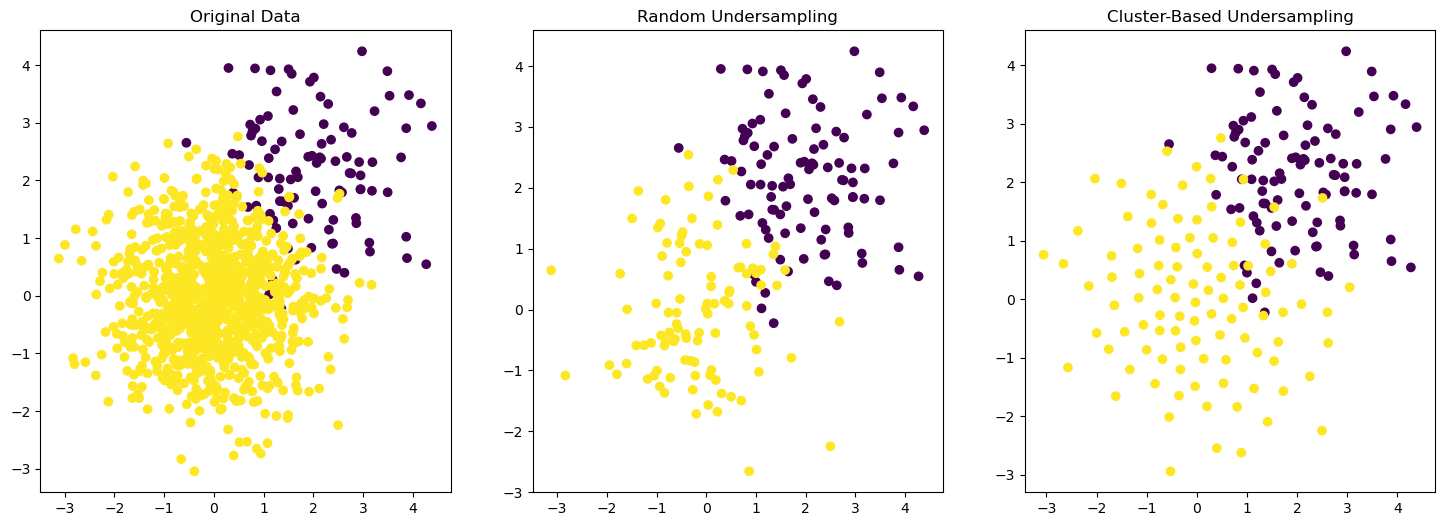

In [7]:
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Generate synthetic data with class imbalance
np.random.seed(0)
X_minority = np.random.normal(loc=2, scale=1, size=(100, 2))
X_majority = np.random.normal(loc=0, scale=1, size=(1000, 2))
X = np.vstack([X_minority, X_majority])
y = np.array([0] * 100 + [1] * 1000)

# Apply undersampling techniques
rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X, y)

cc = ClusterCentroids(random_state=0)
X_cc, y_cc = cc.fit_resample(X, y)

# Plot original and undersampled data
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', label='Original Data')
plt.title('Original Data')

plt.subplot(1, 3, 2)
plt.scatter(X_rus[:, 0], X_rus[:, 1], c=y_rus, cmap='viridis', marker='o', label='Undersampled Data')
plt.title('Random Undersampling')

plt.subplot(1, 3, 3)
plt.scatter(X_cc[:, 0], X_cc[:, 1], c=y_cc, cmap='viridis', marker='o', label='Undersampled Data')
plt.title('Cluster-Based Undersampling')

plt.show()

### Combination of Over- and Under-Sampling

#### Explanation
Combining over- and under-sampling techniques can address class imbalance more effectively by both oversampling the minority class and undersampling the majority class. Two common techniques for this purpose are SMOTEENN and SMOTETomek.

### SMOTEENN (SMOTE + Edited Nearest Neighbors)

SMOTEENN combines SMOTE (Synthetic Minority Over-sampling Technique) with Edited Nearest Neighbors (ENN). It first oversamples the minority class using SMOTE and then cleans the data by removing instances that are misclassified by their nearest neighbors.
  
#### Code and Plot
Let's use Python to demonstrate how SMOTEENN can be applied to handle class imbalance effectively.

In [ ]:
from imblearn.combine import SMOTEENN
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data with class imbalance
np.random.seed(0)
X_minority = np.random.normal(loc=2, scale=1, size=(100, 2))
X_majority = np.random.normal(loc=0, scale=1, size=(1000, 2))
X = np.vstack([X_minority, X_majority])
y = np.array([0] * 100 + [1] * 1000)

# Apply SMOTEENN
smoteenn = SMOTEENN(random_state=0)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X, y)

# Plot original and SMOTEENN data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', label='Original Data')
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.scatter(X_smoteenn[:, 0], X_smoteenn[:, 1], c=y_smoteenn, cmap='viridis', marker='o', label='SMOTEENN Data')
plt.title('SMOTEENN Data')

plt.show()

### SMOTETomek

#### Explanation
SMOTETomek combines SMOTE (Synthetic Minority Over-sampling Technique) with Tomek links to create a more balanced dataset. It oversamples the minority class using SMOTE and then cleans the data by removing borderline examples using Tomek links.

#### Code and Plot
Let's use Python to demonstrate how SMOTETomek can be applied to handle class imbalance effectively.


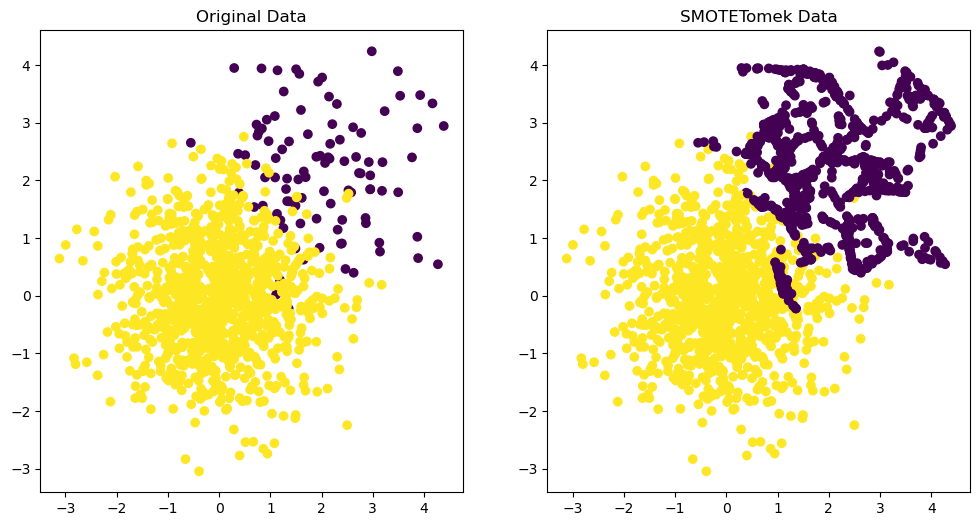

In [10]:
from imblearn.combine import SMOTETomek
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data with class imbalance
np.random.seed(0)
X_minority = np.random.normal(loc=2, scale=1, size=(100, 2))
X_majority = np.random.normal(loc=0, scale=1, size=(1000, 2))
X = np.vstack([X_minority, X_majority])
y = np.array([0] * 100 + [1] * 1000)

# Apply SMOTETomek
smotetomek = SMOTETomek(random_state=0)
X_smotetomek, y_smotetomek = smotetomek.fit_resample(X, y)

# Plot original and SMOTETomek data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', label='Original Data')
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.scatter(X_smotetomek[:, 0], X_smotetomek[:, 1], c=y_smotetomek, cmap='viridis', marker='o', label='SMOTETomek Data')
plt.title('SMOTETomek Data')

plt.show()


###  Cost-Sensitive Learning

#### Explanation
Cost-sensitive learning is a technique used to address class imbalance by modifying the learning algorithm to consider the costs associated with misclassifications of different classes. This can be achieved through weighted loss functions or by adjusting class weights.

####  Weighted Loss Functions

Weighted loss functions modify the loss function used during training to penalize misclassifications of the minority class more heavily. Many machine learning libraries support this by allowing you to set class weights.

#### Code and Plot
Let's use Python to demonstrate how weighted loss functions can be applied to handle class imbalance effectively.


In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Generate synthetic imbalanced data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.95, 0.05], random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define class weights
class_weights = {0: 1, 1: 10}  # heavier penalty for misclassifications of the minority class

# Train Logistic Regression model with weighted loss function
model = LogisticRegression(class_weight=class_weights)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.90      0.94       189
           1       0.25      0.55      0.34        11

    accuracy                           0.89       200
   macro avg       0.61      0.73      0.64       200
weighted avg       0.93      0.89      0.90       200



### Balanced Class Weights

#### Explanation
Balanced class weights adjust the class weights automatically, inversely proportional to class frequencies. Many algorithms, such as SVMs or Logistic Regression in scikit-learn, have parameters to handle this automatically.

#### Code and Plot
Let's use Python to demonstrate how balanced class weights can be applied to handle class imbalance effectively.


In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Generate synthetic imbalanced data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.95, 0.05], random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model with balanced class weights
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.85      0.91       189
           1       0.18      0.55      0.27        11

    accuracy                           0.83       200
   macro avg       0.57      0.70      0.59       200
weighted avg       0.93      0.83      0.87       200



### Bagging (Bootstrap Aggregating)

#### Explanation

Bagging, short for Bootstrap Aggregating, is an ensemble technique that combines the predictions from multiple models to improve robustness and accuracy. It can effectively handle class imbalance by training each model on different balanced subsets of the data. The main idea is to create several subsets of the training data using bootstrapping (random sampling with replacement), train a model on each subset, and then combine the predictions from all models.



1. **Bootstrap Sampling**:
   - Create multiple balanced subsets of the training data using bootstrapping.
   - For each subset, oversample the minority class or undersample the majority class to balance the class distribution.

2. **Model Training**:
   - Train a model on each balanced subset.

3. **Prediction Aggregation**:
   - Combine the predictions from all models, typically using majority voting for classification tasks.

Let $ T $ be the total number of bootstrap samples. For each sample $ t $:
1. Generate a bootstrap sample $ S_t $ from the original training set $ S $.
2. Train a model $ M_t $ on $ S_t $.

For a new instance $ x $, the final prediction is:
$$ \hat{y} = \text{majority\_vote}(M_1(x), M_2(x), \ldots, M_T(x)) $$

#### Code and Plot
Let's use Python to demonstrate how bagging can be applied to handle class imbalance effectively.


In [14]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler

# Generate synthetic imbalanced data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.95, 0.05], random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create balanced bootstrap samples
def balanced_bootstrap(X, y):
    rus = RandomUnderSampler(random_state=42)
    X_res, y_res = rus.fit_resample(X, y)
    return X_res, y_res

# Define the base model
base_model = DecisionTreeClassifier()

# Define the Bagging model with balanced bootstrap samples
bagging_model = BaggingClassifier(
    base_estimator=base_model,
    n_estimators=50,
    bootstrap=True,
    bootstrap_features=False,
    max_samples=1.0,
    max_features=1.0,
    random_state=42
)

# Apply balanced bootstrap samples to each subset
X_bootstrap, y_bootstrap = balanced_bootstrap(X_train, y_train)
bagging_model.fit(X_bootstrap, y_bootstrap)

# Evaluate the model
y_pred = bagging_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.84      0.90       189
           1       0.21      0.73      0.32        11

    accuracy                           0.83       200
   macro avg       0.59      0.78      0.61       200
weighted avg       0.94      0.83      0.87       200



### Boosting Algorithms to Handle Class Imbalance

Boosting is a powerful ensemble technique that combines multiple weak classifiers to create a strong classifier. It iteratively adjusts the weights of incorrectly classified instances to focus more on those instances in subsequent classifiers. This makes boosting particularly effective in dealing with class imbalance.

#### 1. AdaBoost

AdaBoost (Adaptive Boosting) works by iteratively training classifiers and adjusting the weights of misclassified instances so that the subsequent classifier focuses more on those hard-to-classify examples. This process helps the model to improve its performance on the minority class.

##### Mathematical Concept

1. **Initialize weights** for all instances:
   $$
   w_i = \frac{1}{N} \quad \text{for all } i
   $$
   where $ N $ is the number of instances.

2. **Iteratively train weak classifiers**:
   - Train a weak classifier $ h_t $ on the weighted dataset.
   - Calculate the weighted error rate:
     $$
     \epsilon_t = \frac{\sum_{i=1}^N w_i \cdot I(y_i \neq h_t(x_i))}{\sum_{i=1}^N w_i}
     $$
   - Compute the classifier weight:
     $$
     \alpha_t = \ln\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)
     $$
   - Update the weights for each instance:
     $$
     w_i \leftarrow w_i \cdot e^{\alpha_t \cdot I(y_i \neq h_t(x_i))}
     $$
   - Normalize the weights.

3. **Final classifier**:
   $$
   H(x) = \text{sign}\left(\sum_{t=1}^T \alpha_t h_t(x)\right)
   $$

##### Code and Plot

Let's use Python to demonstrate how AdaBoost can handle class imbalance.


In [15]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Generate synthetic imbalanced data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.95, 0.05], random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost model
base_model = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(base_estimator=base_model, n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

# Evaluate the model
y_pred = adaboost_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       189
           1       0.50      0.18      0.27        11

    accuracy                           0.94       200
   macro avg       0.73      0.59      0.62       200
weighted avg       0.93      0.94      0.93       200



###  Gradient Boosting with Class Weights

Gradient Boosting is another powerful ensemble technique that can be adapted to handle class imbalance by adjusting class weights. Algorithms like XGBoost or LightGBM allow the specification of class weights to give more importance to the minority class during training.

#### Mathematical Concept

1. **Initialize the model with a constant value**:
   $$
   F_0(x) = \arg\min_{\gamma} \sum_{i=1}^N L(y_i, \gamma)
   $$

2. **Iteratively update the model**:
   - Compute the pseudo-residuals:
     $$
     r_{im} = -\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right]_{F(x) = F_{m-1}(x)}
     $$
   - Fit a weak learner $ h_m $ to the pseudo-residuals.
   - Update the model:
     $$
     F_m(x) = F_{m-1}(x) + \nu \cdot h_m(x)
     $$
     where $ \nu $ is the learning rate.

#### Code and Plot

Let's use Python to demonstrate how gradient boosting with class weights can handle class imbalance.


In [18]:
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Generate synthetic imbalanced data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.95, 0.05], random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model with class weights
class_weights = {0: 1, 1: 20}
xgb_model = XGBClassifier(scale_pos_weight=class_weights[1])
xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       189
           1       0.75      0.55      0.63        11

    accuracy                           0.96       200
   macro avg       0.86      0.77      0.81       200
weighted avg       0.96      0.96      0.96       200



### Balanced Random Forest

#### Explanation
Balanced Random Forest (BRF) is a variation of the Random Forest algorithm designed to handle class imbalance. In BRF, each decision tree in the ensemble is trained on a balanced bootstrap sample. This is achieved by undersampling the majority class and combining it with the minority class to create a balanced dataset for each tree.

#### Mathematical Concept

1. **Bootstrap Sampling**:
   - For each tree, create a bootstrap sample by randomly undersampling the majority class and sampling all instances of the minority class.
   - This results in a balanced subset for training each tree.

2. **Model Training**:
   - Train each decision tree on its respective balanced bootstrap sample.

3. **Prediction Aggregation**:
   - Combine the predictions from all trees using majority voting for classification tasks.

Let $ T $ be the total number of trees. For each tree $ t $:
1. Generate a balanced bootstrap sample $ S_t $ from the original training set $ S $ by undersampling the majority class and including all instances of the minority class.
2. Train a decision tree $ M_t $ on $ S_t $.

For a new instance $ x $, the final prediction is:
$$ \hat{y} = \text{majority\_vote}(M_1(x), M_2(x), \ldots, M_T(x)) $$

#### Code and Plot

Let's use Python to demonstrate how Balanced Random Forest can be applied to handle class imbalance effectively.


In [20]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report

# Generate synthetic imbalanced data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.95, 0.05], random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Balanced Random Forest model
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = brf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       189
           1       0.25      0.73      0.37        11

    accuracy                           0.86       200
   macro avg       0.62      0.80      0.65       200
weighted avg       0.94      0.86      0.89       200

